In [2]:
import librosa
import matplotlib.pyplot as plt
import torchaudio
import numpy as np
from IPython.display import Audio

WINDOW_SIZE = 8192
SAMPLE_RATE = 44100

melspec = torchaudio.transforms.MelSpectrogram(sample_rate=SAMPLE_RATE, n_mels=70, normalized=True)

/home/ilya/miniconda3/lib/python3.10/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (70) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [12]:
[audio, _] = librosa.load(f"../data/training/annotation_0/audio.wav", sr=44100)

Audio(audio, rate=SAMPLE_RATE)

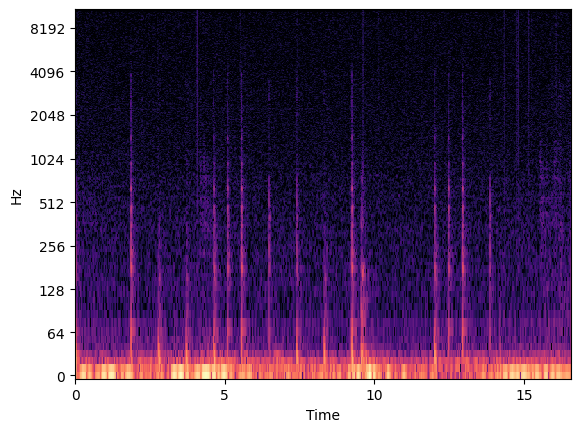

In [7]:
D = np.abs(librosa.stft(audio))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log')

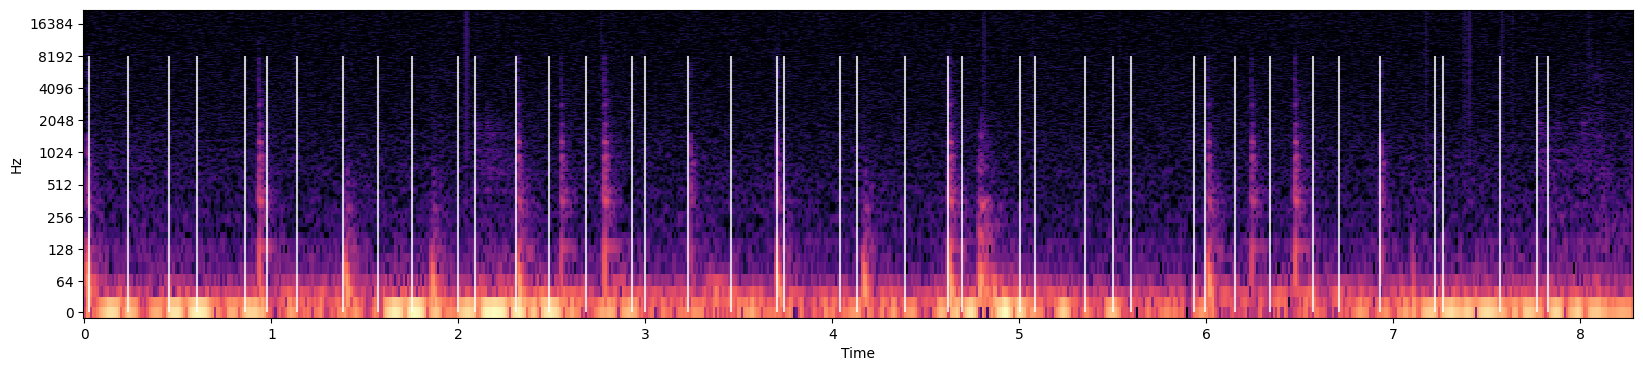

In [19]:
import numpy as np
windows = audio_windows = [audio[i:i + WINDOW_SIZE]
                         for i in range(0, len(audio) - WINDOW_SIZE, WINDOW_SIZE)]

onsets = []

for (index, window) in enumerate(windows):
    [onset] = librosa.onset.onset_detect(
            y=window,
            sr=SAMPLE_RATE,
            backtrack=True,
            units="samples",
            normalize=True,
            pre_max=128,
            post_max=128,
            delta=0.1,
        )
    
    window = np.pad(window[onset:], (0, onset))
    
    onsets.append((onset + index * WINDOW_SIZE) / SAMPLE_RATE)

plt.figure(figsize=(20, 4))

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', sr=SAMPLE_RATE)

plt.vlines(onsets, 0,
             8192, color='w', alpha=0.8,
             label='Selected peaks')

In [5]:
np.argmax([0, 0, 0, 0])

0